In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools.plotting import scatter_matrix

%matplotlib inline

In [22]:
df = pd.read_csv('data/housing.csv', sep=',', encoding='utf8')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Histogram

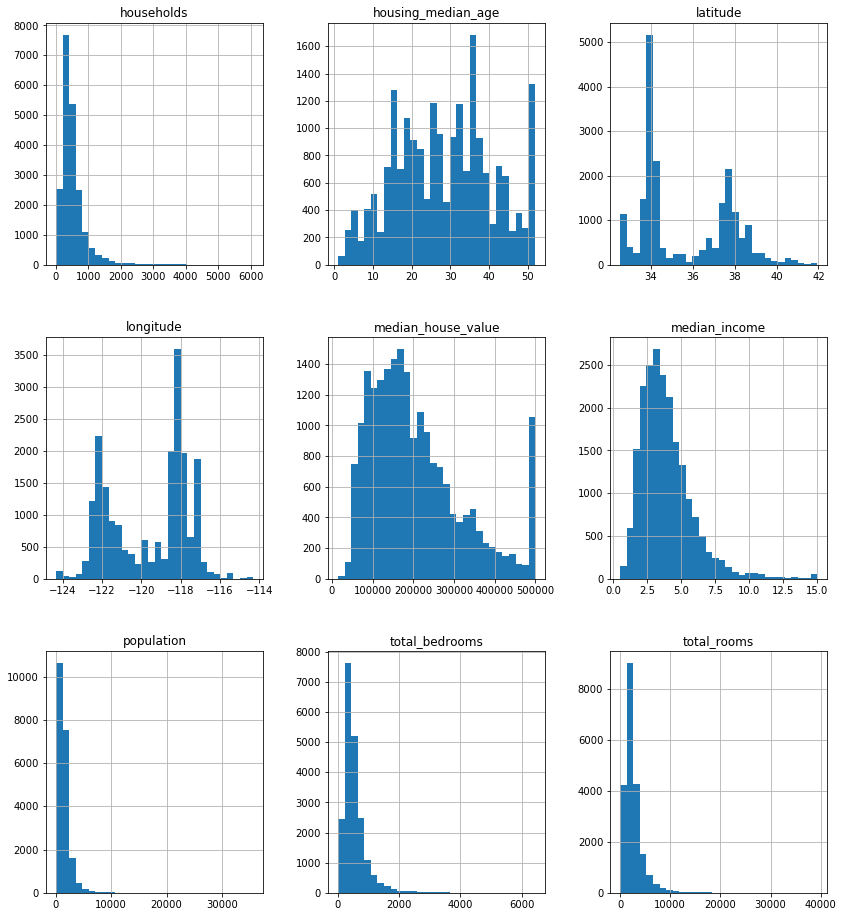

In [6]:
df.hist(bins=30, figsize=(14,16))
plt.show()

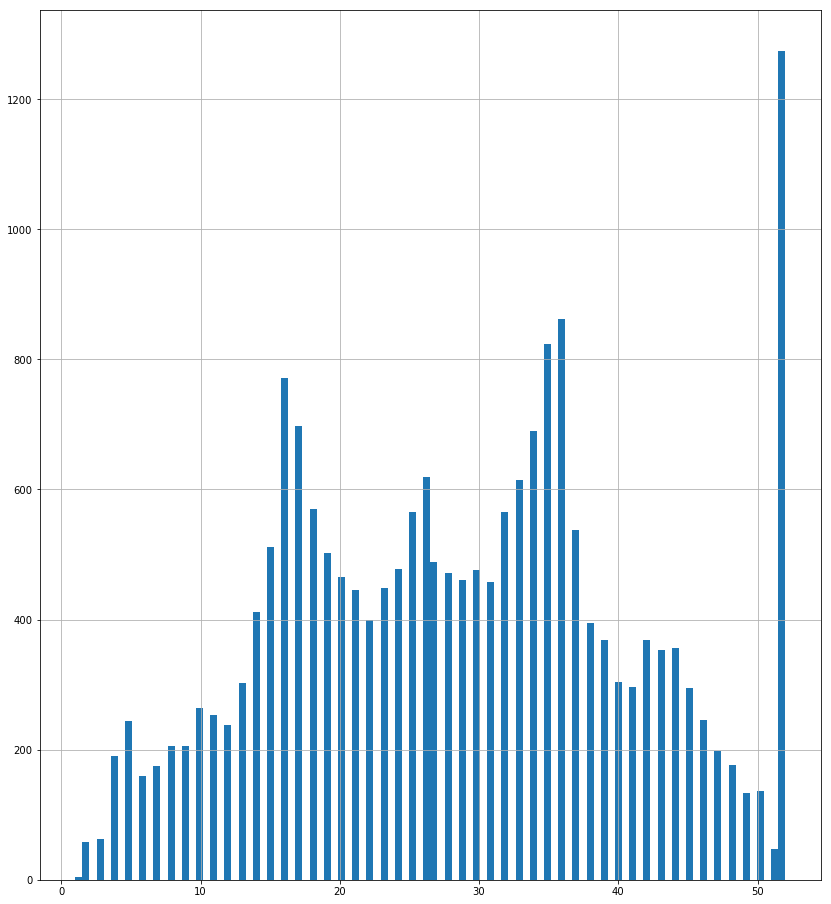

In [7]:
df['housing_median_age'].hist(bins=100, figsize=(14,16))
plt.show()

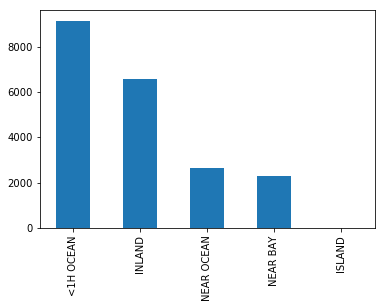

In [8]:
pd.value_counts(df['ocean_proximity']).plot.bar()

## Data Description

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualizing Geographical Data

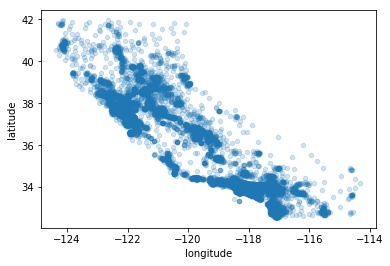

In [13]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.2)

## Regression to Classification

In [14]:
def value_to_class(value):
    _cls= 0
    if value >= 400000:
        _cls = 1
    elif value >= 300000:
        _cls = 2
    elif value >= 200000:
        _cls = 3
    elif value >= 100000:
        _cls = 4
    else:
        _cls = 5
    
    return _cls

In [16]:
df['median_house_CLASS'] = df['median_house_value'].apply(value_to_class)

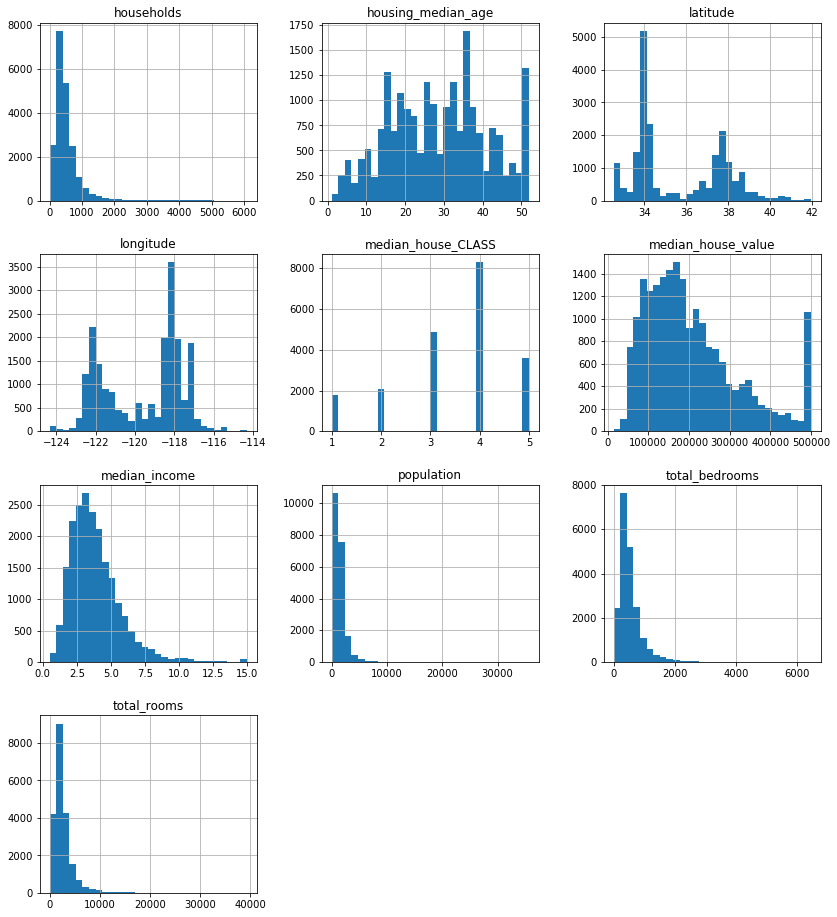

In [17]:
df.hist(bins=30, figsize=(14,16))
plt.show()

## Missing Values

In [17]:
mod_df = pd.read_csv('data/mod_data.csv', sep=',', encoding='utf8')
mod_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126,NaN,452600,NEAR BAY
1,-122.22,37.86,21.0,NaN,1106.0,NaN,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,NaN,1627.0,280.0,565.0,259,3.8462,342200,NEAR BAY


In [5]:
mod_df.isna().sum()

longitude               0
latitude                0
housing_median_age      2
total_rooms             3
total_bedrooms        207
population             10
households              0
median_income           6
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
mod_df.dropna(axis=1).head()

,longitude,latitude,households,median_house_value,ocean_proximity
0,-122.23,37.88,126,452600,NEAR BAY
1,-122.22,37.86,1138,358500,NEAR BAY
2,-122.24,37.85,177,352100,NEAR BAY
3,-122.25,37.85,219,341300,NEAR BAY
4,-122.25,37.85,259,342200,NEAR BAY


In [7]:
mod_df.dropna(axis=0).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219,5.6431,341300,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595,2.0804,226700,NEAR BAY
13,-122.26,37.84,52.0,696.0,191.0,345.0,174,2.6736,191300,NEAR BAY
16,-122.27,37.85,52.0,1966.0,347.0,793.0,331,2.7750,152500,NEAR BAY


In [15]:
mod_df.dropna(axis=1, how='any')

In [19]:
mod_df['total_rooms'].fillna(1).head()

0     880.0
1       1.0
2    1467.0
3    1274.0
4    1627.0
Name: total_rooms, dtype: float64

In [20]:
mod_df['total_rooms'] = mod_df['total_rooms'].fillna(1)

In [21]:
mod_df['population'] = mod_df['population'].fillna( mod_df['population'].mean() )

In [ ]:
mod_df['population'] = mod_df['population'].replace(['MISSED'], np.nan)

## Outliers

In [3]:
salaries = {'ID':['e1', 'e2', 'e3', 'e4', 'e5'],
           'salary':[1000,1800,900,150000,3200]}

salaries_df = pd.DataFrame(salaries)
salaries_df.head()

,ID,salary
0,e1,1000
1,e2,1800
2,e3,900
3,e4,150000
4,e5,3200


In [4]:
salaries_df['salary'].mean()

31380.0

### Detecting using Plotting

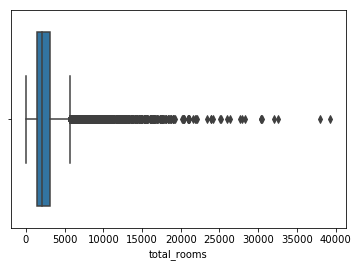

In [5]:
sns.boxplot(x=df['total_rooms'])

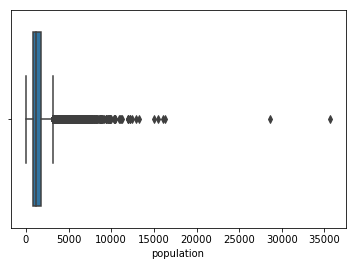

In [28]:
sns.boxplot(x=df['population'])

In [6]:
print("All:", df['total_rooms'].count())

print("Outliers:", df[ (df['total_rooms']>5000) ] ['total_rooms'].count())

All: 20640
Outliers: 1758


In [7]:
clean_df = df[ (df['total_rooms']<5000) ]

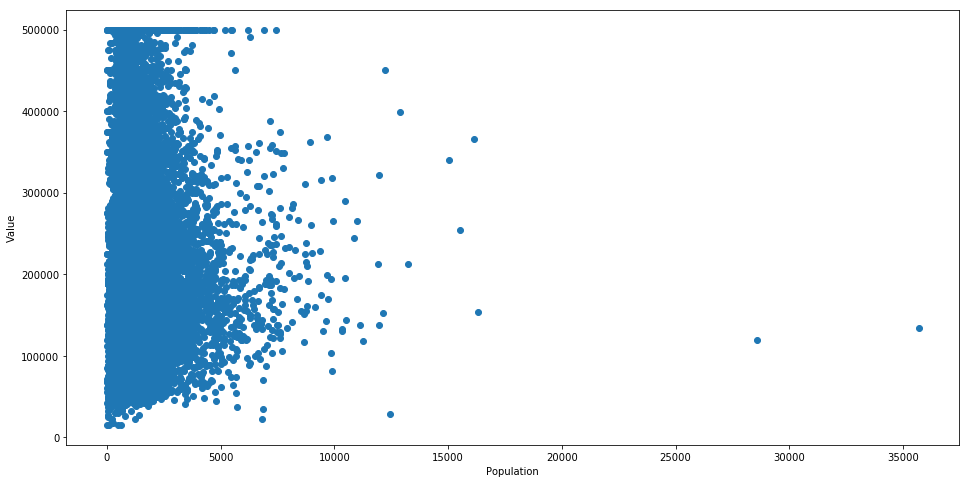

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['population'], df['median_house_value'])

ax.set_xlabel('Population')
ax.set_ylabel('Value')

plt.show()

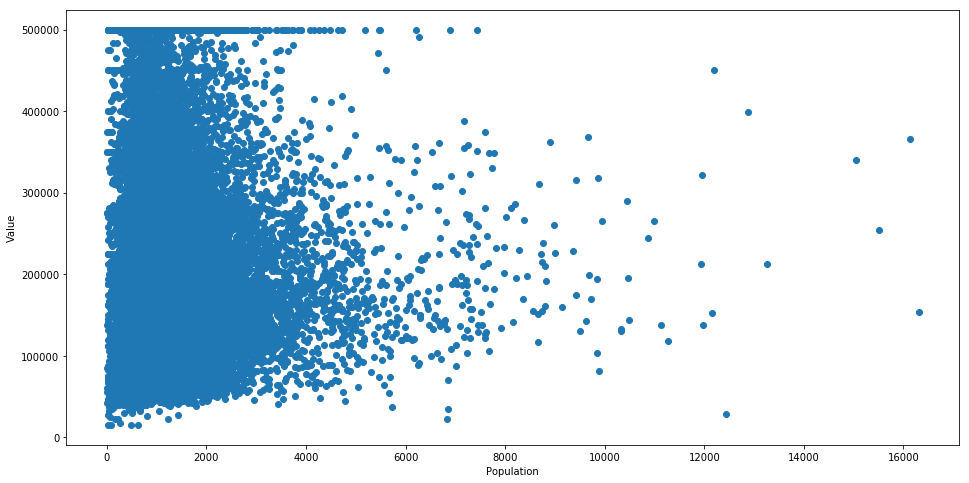

In [9]:
t_df = df[ df['population'] < 20000 ]
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(t_df['population'], t_df['median_house_value'])

ax.set_xlabel('Population')
ax.set_ylabel('Value')

plt.show()

In [10]:
clean_df = df[ (df['total_rooms']<5000) & (df['population'] < 20000) ]

### Detecting using Z-Score

In [12]:
z = np.abs( stats.zscore(df.drop(['ocean_proximity'], axis=1)) )
print(z.shape)

(20640, 9)


In [13]:
_res = np.where( z > 3 )

C:\Users\Home\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [14]:
print(_res[0])
print(_res[1])

[   95   104   116 ..., 20629 20629 20629]
[6 6 6 ..., 3 5 6]


In [15]:
z[95][6]

4.7694548510552801

# Correlation

In [16]:
x = np.random.randint(0,100,1000)
y = np.random.randint(0,100,1000)

np.corrcoef(x,y)

array([[ 1.       , -0.0225981],
       [-0.0225981,  1.       ]])

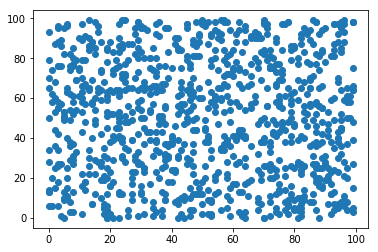

In [17]:
plt.scatter(x,y)
plt.show()

In [18]:
x = np.random.randint(0,100,1000)
y = x + np.random.randint(0,100,1000)

np.corrcoef(x,y)

array([[ 1.        ,  0.70877975],
       [ 0.70877975,  1.        ]])

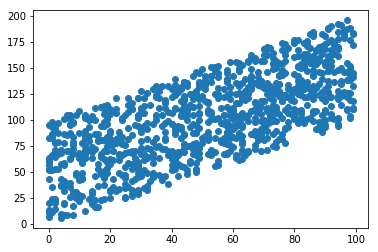

In [19]:
plt.scatter(x,y)
plt.show()

In [20]:
x = np.random.randint(0,100,1000)
y = 100 - x - np.random.randint(0,100,1000)

np.corrcoef(x,y)

array([[ 1.        , -0.69668116],
       [-0.69668116,  1.        ]])

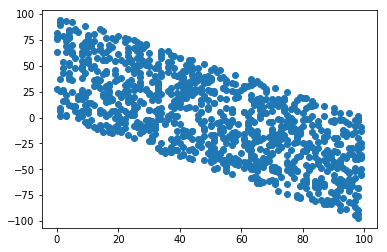

In [21]:
plt.scatter(x,y)
plt.show()

In [37]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


C:\Users\Home\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD8CFCE48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD8910D68>]], dtype=object)

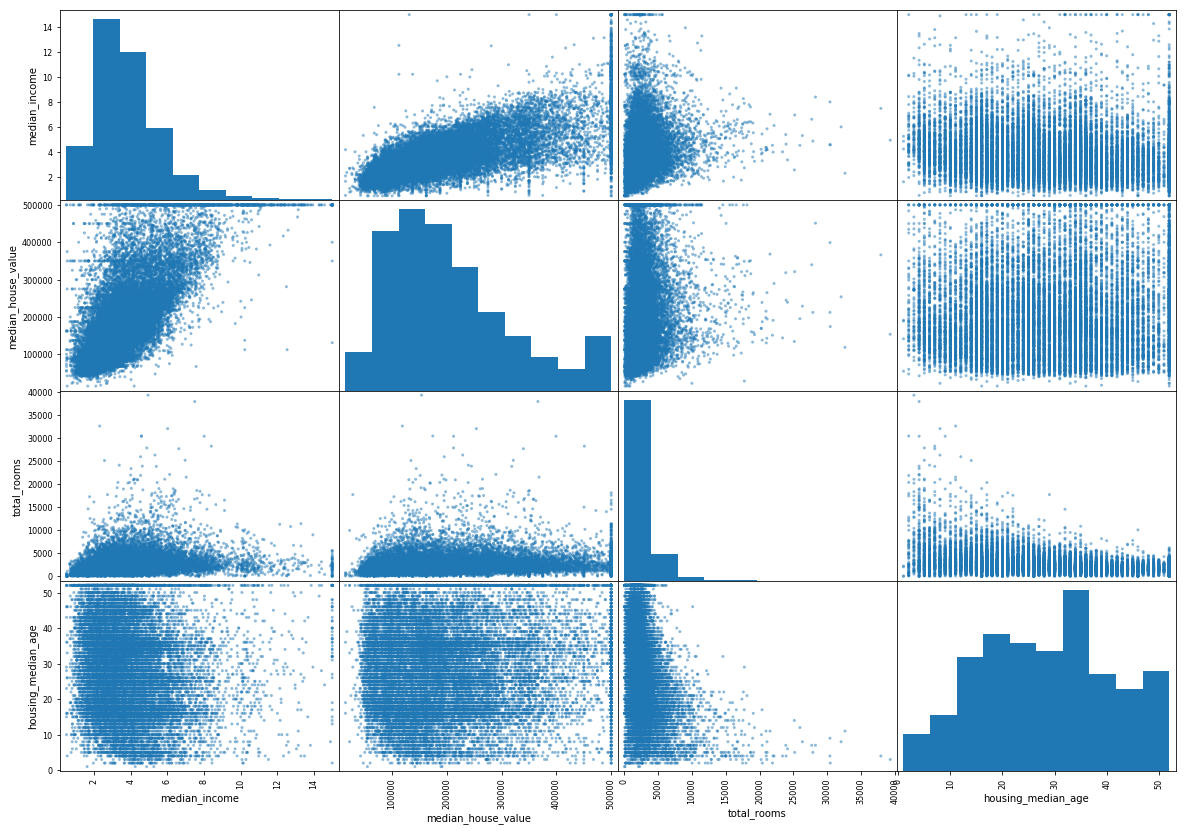

In [25]:
cols = ["median_income","median_house_value","total_rooms","housing_median_age"]

scatter_matrix(df[cols], figsize=(20, 14))

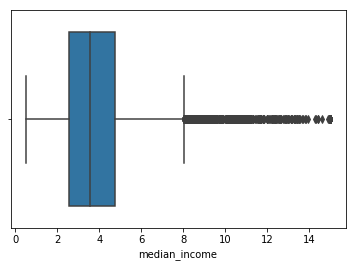

In [38]:
sns.boxplot(x=df['median_income'])

In [39]:
print(df['median_income'].shape[0])

print(df[ (df['median_income']>=8) ]['median_income'].shape[0])

20640
691


In [40]:
clean_df = df[ (df['median_income']<8) ]

In [42]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [41]:
clean_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923912,-0.106562,0.042173,0.067755,0.099845,0.053360,-0.014486,-0.047066
latitude,-0.923912,1.000000,0.007190,-0.031391,-0.066482,-0.110178,-0.070708,-0.081558,-0.147510
housing_median_age,-0.106562,0.007190,1.000000,-0.365345,-0.323338,-0.297317,-0.305244,-0.158781,0.117738
total_rooms,0.042173,-0.031391,-0.365345,1.000000,0.935088,0.858314,0.921657,0.226265,0.123723
total_bedrooms,0.067755,-0.066482,-0.323338,0.935088,1.000000,0.876045,0.979379,0.029442,0.072668
population,0.099845,-0.110178,-0.297317,0.858314,0.876045,1.000000,0.905987,0.038200,-0.013536
households,0.053360,-0.070708,-0.305244,0.921657,0.979379,0.905987,1.000000,0.053022,0.088212
median_income,-0.014486,-0.081558,-0.158781,0.226265,0.029442,0.038200,0.053022,1.000000,0.620828
median_house_value,-0.047066,-0.147510,0.117738,0.123723,0.072668,-0.013536,0.088212,0.620828,1.000000


C:\Users\Home\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFD8BAFD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FFDB813D68>]], dtype=object)

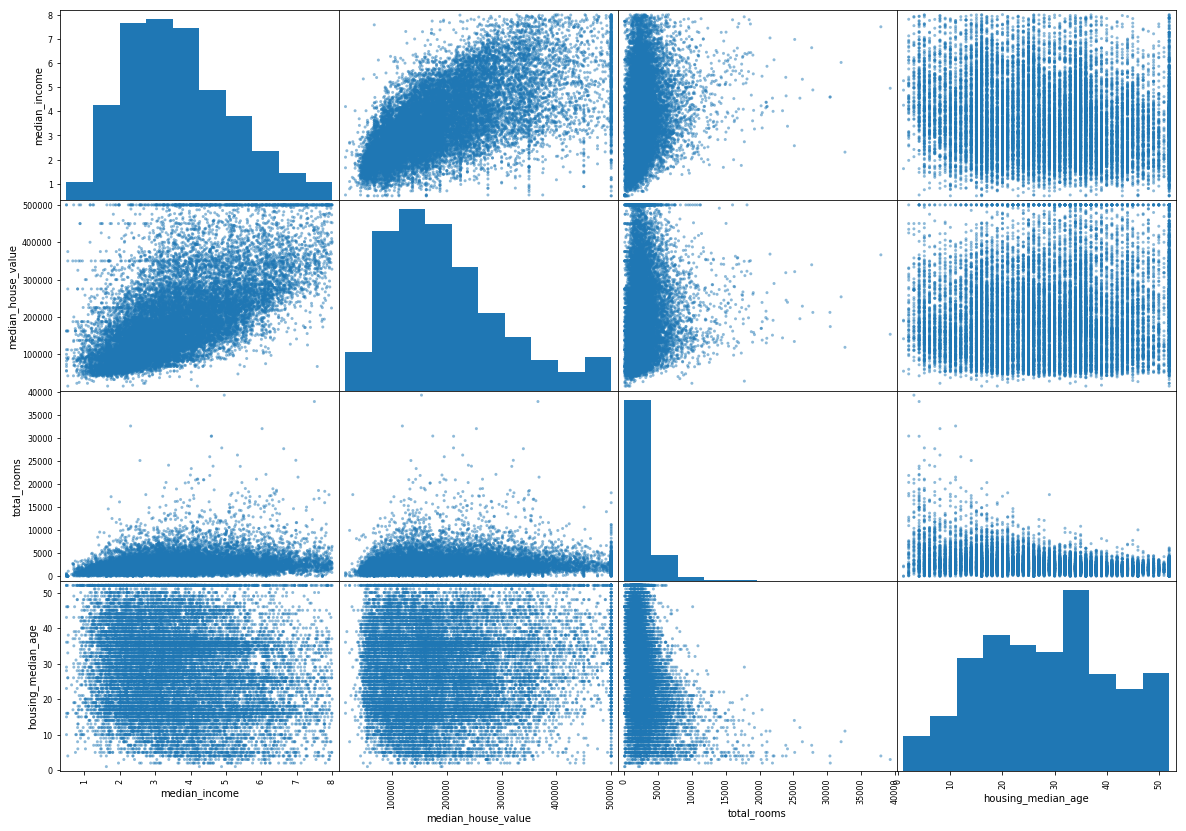

In [43]:
cols = ["median_income","median_house_value","total_rooms","housing_median_age"]

scatter_matrix(clean_df[cols], figsize=(20, 14))

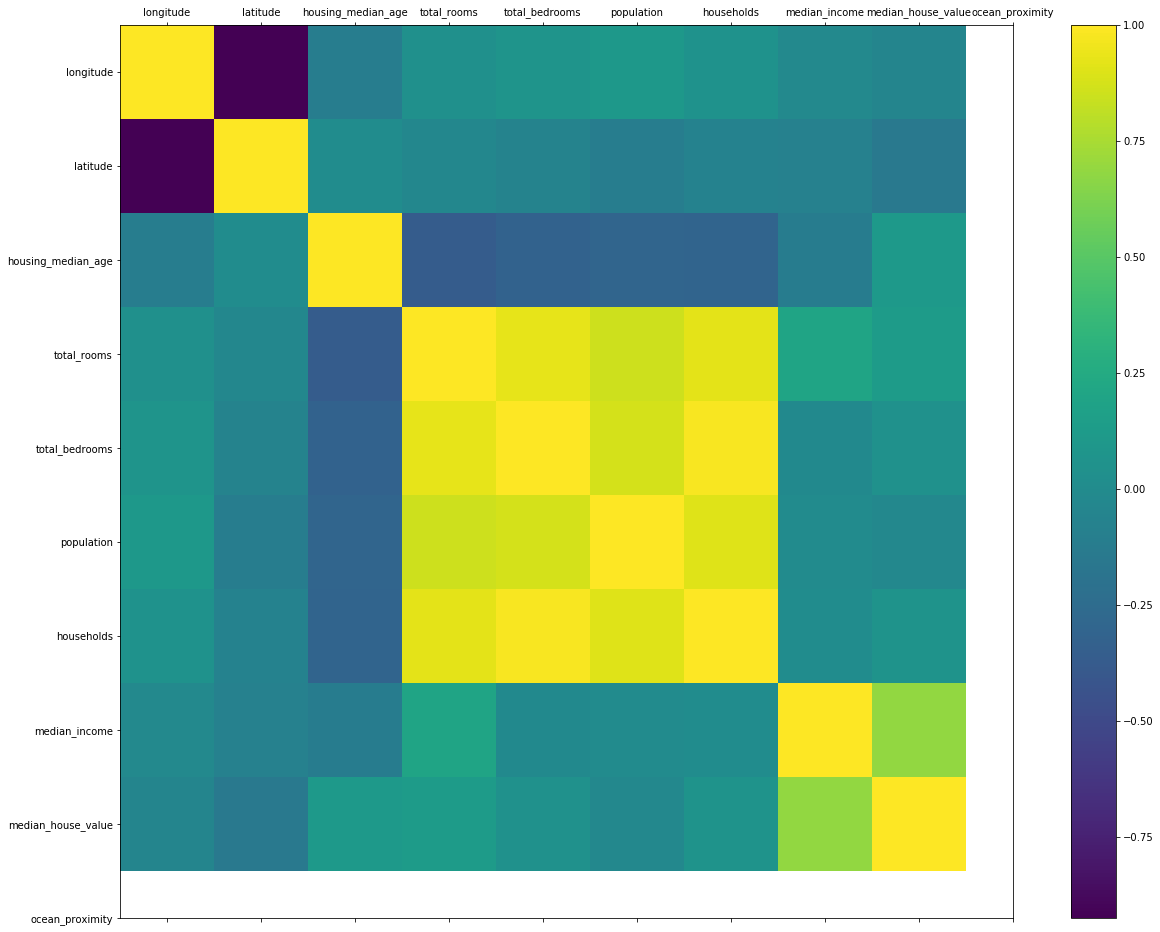

In [44]:
plt.figure(figsize=(21,16))
plt.matshow(df.corr(), fignum=1)

plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)

plt.colorbar()
plt.show()